# Great Places to Stay: A closer look at New York and Toronto AirBnB data

This project aims at evaluating data from New York and Toronto AirBnBs, that was retrieved from [InsideAirBnB](http://insideairbnb.com/get-the-data.html) in October 2020. 

## Table of Contents
1. [Business Understanding](#biz_understanding)
2. [Data Understanding](#data_understanding)
3. [Data Preparation](#data_prep)
4. [Analysis & Visualization](#analysis)
5. [Conclusion](#conclusion)

## <a id="biz_understanding"/> Business Understanding

Inside AirBnB gathers and collects publicly available data about a city's AirBnB listings. Among the data provided is a detailed overview of property listings, calendar availability and AirBnB stay reviews. 

I planned to visit New York and Toronto this summer, but had to reschedule due to the Covid-19 situation. I did not get  as far as looking into accomodation, but would have probably considered AirBnB. Inspired by this, I plan to use the AirBnB data to look into the following questions: 

1. [When is the best time to visit New York and Toronto?](#when)
    - What are the busiest times of the year to visit New York and Toronto? By how much do prices spike?
    
    
2. [What budget do I need to plan for accomodation in both cities?](#budget)
    - What does an AirBnB stay in New York and Toronto cost (on average, minimum, maximum)? 
    
    
3. [In which neighborhoods should I stay?](#where) 
    - Which are the neighbourhoods with the highest density of Airbnb accommodations?
    - Which neighbourhoods have the best average reviews? How do they compare on location review score?
    - How do the neighborhoods compare in price? 
    - How do the neighbourhoods compare in availability of certain room types?
    
    
4. [Do different neighbourhoods have a different vibe?](#vibe)
    - What are the most common words used to describe a listing? How does this compare from New York to Toronto and for different neighbourhoods? Are the same words used in the review texts?

## <a id="data_understanding"/> Data Understanding

First, I am importing the listing, review and calendar data for both cities, and explore it to gain a better data understanding.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
import re
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
# all data is publicly available at Inside AirBnb: http://insideairbnb.com/get-the-data.html

# loading in the New York data
listings_ny = pd.read_csv('newyork_data/listings.csv')
reviews_ny = pd.read_csv('newyork_data/reviews.csv')
calendar_ny = pd.read_csv('newyork_data/calendar.csv')

# loading in the Toronto data
listings_to = pd.read_csv('toronto_data/listings.csv')
reviews_to = pd.read_csv('toronto_data/reviews.csv')
calendar_to = pd.read_csv('toronto_data/calendar.csv')

In [3]:
# assessing the top 5 rows in the listings_ny dataset
listings_ny.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20200907203555,2020-09-08,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,10.0,10.0,9.0,NaN,f,2,2,0,0,0.37
1,3831,https://www.airbnb.com/rooms/3831,20200907203555,2020-09-08,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,9.0,9.0,9.0,NaN,f,1,1,0,0,4.82
2,5121,https://www.airbnb.com/rooms/5121,20200907203555,2020-09-08,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,10.0,9.0,9.0,NaN,f,1,0,1,0,0.36
3,5136,https://www.airbnb.com/rooms/5136,20200907203555,2020-09-09,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/a3f7ace8-e7a9...,7378,https://www.airbnb.com/users/show/7378,...,10.0,8.0,10.0,NaN,f,1,1,0,0,0.01
4,5178,https://www.airbnb.com/rooms/5178,20200907203555,2020-09-08,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,9.0,10.0,9.0,NaN,f,1,0,1,0,3.42


*listings_ny* lists a very detailed overview for each individual listing, including 74 variable columns. 

In [4]:
# assessing the top 5 rows in the listings_to dataset
listings_to.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20200909043044,2020-09-09,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.11
1,8077,https://www.airbnb.com/rooms/8077,20200909043044,2020-09-10,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,...,10.0,10.0,10.0,NaN,t,2,1,1,0,1.25
2,12604,https://www.airbnb.com/rooms/12604,20200909043044,2020-09-09,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlou...,NaN,https://a0.muscache.com/pictures/5282025/91fca...,48239,https://www.airbnb.com/users/show/48239,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,23691,https://www.airbnb.com/rooms/23691,20200909043044,2020-09-10,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,...,10.0,9.0,10.0,NaN,t,2,0,2,0,1.73
4,26654,https://www.airbnb.com/rooms/26654,20200909043044,2020-09-09,World Class downtown @CN Tower Theatre MTCC ga...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",There's a reason they call it the Entertainmen...,https://a0.muscache.com/pictures/81811785/5dcd...,113345,https://www.airbnb.com/users/show/113345,...,9.0,10.0,9.0,NaN,t,5,5,0,0,0.34


*listings_to* equally lists a very detailed overview for each individual listing, including 74 variable columns. Let's have a closer look at the individual columns:

In [5]:
# assessing null-values and datatypes for listings_ny
listings_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45756 entries, 0 to 45755
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            45756 non-null  int64  
 1   listing_url                                   45756 non-null  object 
 2   scrape_id                                     45756 non-null  int64  
 3   last_scraped                                  45756 non-null  object 
 4   name                                          45738 non-null  object 
 5   description                                   44407 non-null  object 
 6   neighborhood_overview                         29061 non-null  object 
 7   picture_url                                   45756 non-null  object 
 8   host_id                                       45756 non-null  int64  
 9   host_url                                      45756 non-null 

*listings_ny*'s columns have general information about the listing, lots of host-focused columns, neighborhood and spatial information, information on rooms and amenities, availability and review data, etc. Interestingly, many columns have no or only a low percentage of null-values. The columns "bathrooms", "calendar_updated" and "license" are completely filled with null values. "Price" seems to be a string instead of float.

In [6]:
# assessing null-values and datatypes for listings_to
listings_to.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19343 entries, 0 to 19342
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19343 non-null  int64  
 1   listing_url                                   19343 non-null  object 
 2   scrape_id                                     19343 non-null  int64  
 3   last_scraped                                  19343 non-null  object 
 4   name                                          19342 non-null  object 
 5   description                                   18623 non-null  object 
 6   neighborhood_overview                         12364 non-null  object 
 7   picture_url                                   19343 non-null  object 
 8   host_id                                       19343 non-null  int64  
 9   host_url                                      19343 non-null 

Also *listings_to*'s columns have general information about the listing, lots of host-focused columns, neighborhood and spatial information, information on rooms and amenities, availability and review data, etc. Again, many columns have no or only a low percentage of null-values. The columns "neighbourhood_group_cleansed", "bathrooms", "calendar_updated" and "license" are completely filled with null values. "Price" seems to be a string instead of float.

Before moving on to the reviews datasets, I am assessing some of the categorical variables that could be of interest in the analysis and evaluation phase. Namely, these will be: *neighbourhood_group_cleansed*, *neighbourhood_cleansed*, and *room_type*.

In [7]:
# assessing neighbourhood groups in New York
listings_ny.neighbourhood_group_cleansed.value_counts()

Manhattan        20236
Brooklyn         18263
Queens            5746
Bronx             1185
Staten Island      326
Name: neighbourhood_group_cleansed, dtype: int64

Manhattan has the highest number of listings. These groups can easily be used for categorizing AirBnBs. Toronto has no neighborhood groups, so I am assessing how many neighborhoods are listed instead. 

In [8]:
# assessing neighbourhoods in Toronto
listings_to.neighbourhood_cleansed.nunique()

140

Toronto has 140 individual neighbourhoods. If I want to compare neighbourhoods in a meaningful way, I will have to find an alternative solution than using neighbourhood groups. Next, I am having a look at the available room types in both cities:

In [9]:
# assessing room_types in New York
display(listings_ny.room_type.value_counts())

# assessing room_types in Toronto
display(listings_to.room_type.value_counts())

Entire home/apt    23577
Private room       20842
Shared room          944
Hotel room           393
Name: room_type, dtype: int64

Entire home/apt    12240
Private room        6693
Shared room          347
Hotel room            63
Name: room_type, dtype: int64

In both New York and Toronto, "Entire home/apt" is the most common room type. Other room types are "Private room", "Shared room", and "Hotel room".

Next up, let's have a look at the reviews data:

In [10]:
# assessing the top 5 rows in the reviews_ny dataset
reviews_ny.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r\nNous avons app...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


*reviews_ny* lists individual reviews for the listings. Each row includes a listing id, review id, date, reviewer id, reviewer name, and the review text. Not all reviews are in English language.

In [11]:
# assessing datatypes and null values for reviews_ny
reviews_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032264 entries, 0 to 1032263
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1032264 non-null  int64 
 1   id             1032264 non-null  int64 
 2   date           1032264 non-null  object
 3   reviewer_id    1032264 non-null  int64 
 4   reviewer_name  1032256 non-null  object
 5   comments       1031579 non-null  object
dtypes: int64(3), object(3)
memory usage: 47.3+ MB


Except for a small percentage of rows in the comments section, there are no null values in the dataset. The dataset includes 1,032,264 reviews. Next, I am having a look at the Toronto reviews:

In [12]:
# assessing the top 5 rows in the reviews_to dataset
reviews_to.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1419,38924112,2015-07-19,11308465,Marcela,Having the opportunity of arriving to Alexandr...
1,1419,44791978,2015-08-29,9580285,Marco,We have no enough words to describe how beauty...
2,1419,45957133,2015-09-07,38394721,Andrea,The listing was exceptional and an even better...
3,1419,67295154,2016-03-28,3515044,Shaun,Alexandra's home was amazing and in such a nea...
4,1419,177702208,2017-08-03,13987100,Kate,Beautiful home. Very comfortable and clean. Pe...


*reviews_to* lists individual reviews for the listings. Each row includes a listing id, review id, date, reviewer id, reviewer name, and the review text.

In [13]:
# assessing datatypes and null values for reviews_to
reviews_to.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521228 entries, 0 to 521227
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     521228 non-null  int64 
 1   id             521228 non-null  int64 
 2   date           521228 non-null  object
 3   reviewer_id    521228 non-null  int64 
 4   reviewer_name  521228 non-null  object
 5   comments       520836 non-null  object
dtypes: int64(3), object(3)
memory usage: 23.9+ MB


Except for a small percentage of rows in the comments section, there are no null values in the dataset. The dataset includes 521,228 reviews. Next, I am having a look at the calendar data.

In [14]:
# assessing the top 5 rows in the calendar_ny dataset
calendar_ny.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,42729,2020-09-09,t,$125.00,$125.00,2.0,90.0
1,16458,2020-09-08,f,$250.00,$250.00,3.0,14.0
2,16458,2020-09-09,f,$250.00,$250.00,3.0,14.0
3,16458,2020-09-10,f,$250.00,$250.00,3.0,14.0
4,16458,2020-09-11,f,$250.00,$250.00,3.0,14.0


In [15]:
# assessing the top 5 rows in the calendar_to dataset
calendar_to.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,535079,2020-09-10,f,$65.00,$65.00,1.0,365.0
1,1419,2020-09-09,f,$469.00,$469.00,4.0,730.0
2,1419,2020-09-10,f,$469.00,$469.00,4.0,730.0
3,1419,2020-09-11,f,$469.00,$469.00,4.0,730.0
4,1419,2020-09-12,f,$469.00,$469.00,4.0,730.0


*calendar_ny* and *calendar_to* show the availability of listings on certain dates. Availability is encoded as f or t in the "available" column. Additionally, the calendar provides information on the price (and an adjusted price) for staying at this AirBnB at this date, and the number of minimum and maximum nights per stay. 

Before moving on to answering my questions on the AirBnB data, I am summing up the data understanding with some last enquiries about the number of listings, hosts, the calendar range, and timeframe when the reviews were given:

In [16]:
print('The New York AirBnB data has {} listings, with properties rented out by {} hosts.'.
      format(listings_ny.shape[0], listings_ny.host_id.nunique()))
print('The New York AirBnB data has {} reviews, provided from {} to {}.'.
      format(reviews_ny.shape[0], reviews_ny.date.min(), reviews_ny.date.max()))
print('The availability data for New York AirBnBs has been provided from {} to {} on {} homes.'.
      format(calendar_ny.date.min(), calendar_ny.date.max(), calendar_ny.listing_id.nunique()))

The New York AirBnB data has 45756 listings, with properties rented out by 34826 hosts.
The New York AirBnB data has 1032264 reviews, provided from 2009-04-23 to 2020-09-08.
The availability data for New York AirBnBs has been provided from 2020-09-07 to 2021-09-08 on 45749 homes.


In [17]:
print('The Toronto AirBnB data has {} listings, with properties rented out by {} hosts.'.
      format(listings_to.shape[0], listings_to.host_id.nunique()))
print('The Toronto AirBnB data has {} reviews, provided from {} to {}.'.
      format(reviews_to.shape[0], reviews_to.date.min(), reviews_to.date.max()))
print('The availability data for Toronto AirBnBs has been provided from {} to {} on {} homes.'.
      format(calendar_to.date.min(), calendar_to.date.max(), calendar_to.listing_id.nunique()))

The Toronto AirBnB data has 19343 listings, with properties rented out by 12837 hosts.
The Toronto AirBnB data has 521228 reviews, provided from 2009-08-20 to 2020-09-10.
The availability data for Toronto AirBnBs has been provided from 2020-09-09 to 2021-09-10 on 19343 homes.


## <a id="data_prep"/> Data Preparation

The dataframes only have minor issues that need to be addressed before being able to answer the questions. Within the data preparation phase, I will deal with the "available" column in the calendar datasets (encoding t and f as 0 and 1), and the "price" column in the calendar and listings datasets. Any other wrangling and preparation steps needed for answering individual questions will be addressed when answering those questions.

In [18]:
# creating copies of the original dataframes
listings_ny_orig = listings_ny.copy()
reviews_ny_orig = reviews_ny.copy()
calendar_ny_orig = calendar_ny.copy()

listings_to_orig = listings_to.copy()
reviews_to_orig = reviews_to.copy()
calendar_to_orig = calendar_to.copy()

### Encoding availability

In [19]:
# Mapping t as 0 and f as 1 from the available column in the calendars, 
# to simplify calculations about listing availability.
calendar_ny['booked'] = calendar_ny.available.map( lambda x: 0 if x == 't' else 1)
calendar_to['booked'] = calendar_to.available.map( lambda x: 0 if x == 't' else 1)

# test
display(calendar_ny.head(2))
display(calendar_to.head(2))

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,booked
0,42729,2020-09-09,t,$125.00,$125.00,2.0,90.0,0
1,16458,2020-09-08,f,$250.00,$250.00,3.0,14.0,1


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,booked
0,535079,2020-09-10,f,$65.00,$65.00,1.0,365.0,1
1,1419,2020-09-09,f,$469.00,$469.00,4.0,730.0,1


### Transforming price to float

In [20]:
# defining a price to float function
def price_to_float(price): 
    """Replacing any dollar signs and commas found in a text string with nothing. 
    Transforming the string to float.

    Parameters
    ----------
    price : string
        A price string that needs to be transformed to float.

    Returns
    -------
        Price as a float.
    """
    try:
        price = price.replace(',', '')
        price = price.replace('$', '')
        return float(price)
    except:
        return float(price)

In [21]:
# applying price_to_float to the calendars and listings dataframes
calendar_ny['price'] = calendar_ny['price'].map(price_to_float)
calendar_to['price'] = calendar_to['price'].map(price_to_float)
listings_ny['price'] = listings_ny['price'].map(price_to_float)
listings_to['price'] = listings_to['price'].map(price_to_float)

# test
display(calendar_ny.price.describe())
display(calendar_to.price.describe())
display(listings_ny.price.describe())
display(listings_to.price.describe())

count    1.669850e+07
mean     1.586471e+02
std      3.726080e+02
min      0.000000e+00
25%      6.500000e+01
50%      1.000000e+02
75%      1.700000e+02
max      1.379800e+04
Name: price, dtype: float64

count    7.059909e+06
mean     1.549779e+02
std      3.155941e+02
min      1.000000e+01
25%      6.500000e+01
50%      1.000000e+02
75%      1.590000e+02
max      1.316400e+04
Name: price, dtype: float64

count    45756.000000
mean       149.557483
std        315.367928
min          0.000000
25%         65.000000
50%        100.000000
75%        160.000000
max      10000.000000
Name: price, dtype: float64

count    19343.000000
mean       141.278116
std        290.664182
min         12.000000
25%         63.000000
50%        100.000000
75%        150.000000
max      13164.000000
Name: price, dtype: float64

When looking at the price columns, it becomes clear, that their are quite some outliers. As an example, I am going to plot a boxplot of the New York calendar price data below:

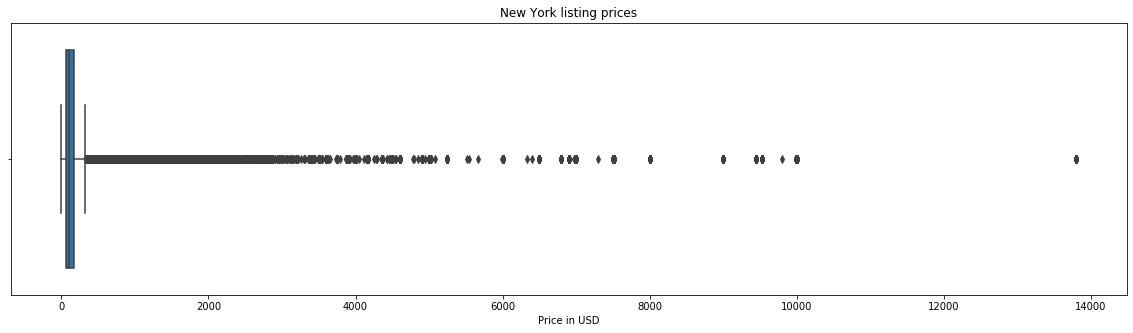

In [22]:
# boxplot for prices in New York calendar dataframe
fig = plt.figure(figsize=(20,5))
sns.boxplot(calendar_ny.price)
plt.title("New York listing prices")
plt.xlabel('Price in USD')
plt.show()

## <a id="analysis"/> Analysis and Visualization

### <a id="when"/> When is the best time to visit New York and Toronto?

To answer this question, I am going to use the calendar data. I am interested in two facets: Availability and price. To determine the busiest times of the year to visit New York and Toronto, I am going to plot the proportion of homes available over time. The price dimension is equally interesting. By how much do prices spike according to seasonality? To determine this, I am going to plot how median listing prices change over time.

In [23]:
# creating copies of the calendars
availability_ny = calendar_ny.copy()
availability_to = calendar_to.copy()

In [24]:
# calculating mean listing availability grouped by date
availability_date_ny = availability_ny.groupby('date')['booked'].mean().reset_index()
availability_date_ny['date'] = pd.to_datetime(availability_date_ny['date'])

availability_date_to = availability_to.groupby('date')['booked'].mean().reset_index()
availability_date_to['date'] = pd.to_datetime(availability_date_to['date'])

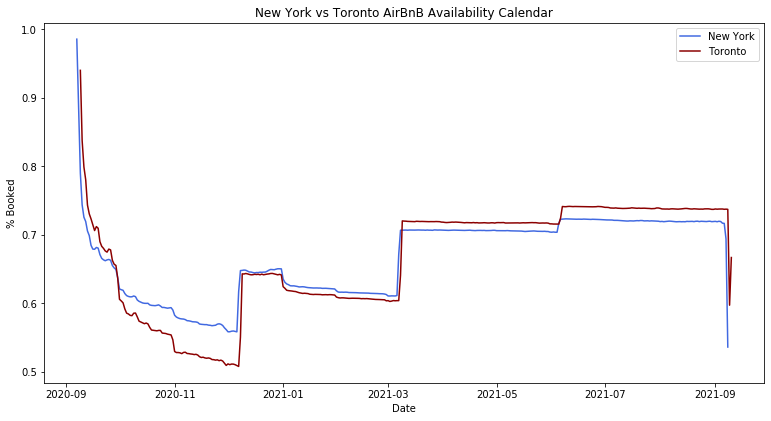

In [25]:
# plotting 
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(availability_date_ny['date'], availability_date_ny['booked'], 'royalblue', label='New York')
ax.plot(availability_date_to['date'], availability_date_to['booked'], 'darkred', label='Toronto')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('% Booked')
plt.title('New York vs Toronto AirBnB Availability Calendar')
plt.show();

In both New York and Toronto, the proportion of booked listings for any given date never falls below 50%. The calendar data was retrieved in September 2020, so it is no suprise, that the curve starts close to fully booked. Until December, the curves fall to almost 50% in Toronto, and around 57% in New York. Judging from the steepness of the curve in the beginning, it seems that AirBnBs in both cities are booked latest 2-4 weeks in advance to the stay. 

In December, the bookings increase again, mimicking stairs. The first huge increase is at the beginning of December (possibly due to the Christmas period). After New Year's, the bookings decrease slightly, but remain almost flat until spring. Then, another jump to over 70% occurs in both cities. The next small jump occurs in June, with ca. 75% booked listings. The availability curves for both cities are nearly equal, the only difference being a ca. 2-6% higher proportion of New York AirBnBs being booked in October and November than in Toronto, and ca. 1-3% lower proportion of booked meetings in New York than Toronto in the spring and summer months.

Next, I am evaluating price over time. As in theory, we are researching the best time for me to book an AirBnB in those cities, I am only going to evaluate available listings. 

In [26]:
# creating copies of the calendars
price_ny = calendar_ny.copy()
price_to = calendar_to.copy()

# selecting available listings only, calculating average price grouped by date
available_listings_ny = price_ny[price_ny.available == 't']
avg_price_date_ny = available_listings_ny.groupby('date')['price'].mean().reset_index()
avg_price_date_ny['date'] = pd.to_datetime(avg_price_date_ny['date'])

available_listings_to = price_to[price_to.available == 't']
avg_price_date_to = available_listings_to.groupby('date')['price'].mean().reset_index()
avg_price_date_to['date'] = pd.to_datetime(avg_price_date_to['date'])

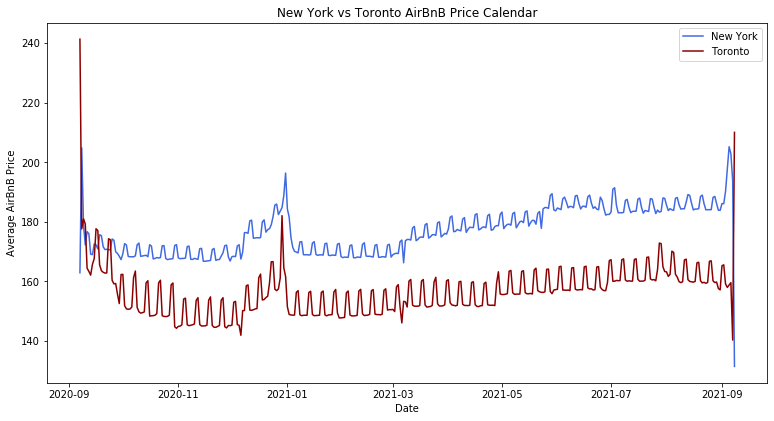

In [27]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(avg_price_date_ny['date'], avg_price_date_ny['price'], 'royalblue', label='New York')
ax.plot(avg_price_date_ny['date'], avg_price_date_to['price'], 'darkred', label='Toronto')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Average AirBnB Price')
plt.title('New York vs Toronto AirBnB Price Calendar');

Again, it pays off to book in time. This becomes apparent, when watching the first spike in price at the calendar start. In New York, it is 30 dollars cheaper to be spontaneous than in Toronto. Overall, the average listing price in New York is 20 to 30 $ more expensive than in Toronto. In both cities, prices spike on weekends. The price curves are relatively flat. One exception is a price increase during Christmas season leading up to New Years Eve. In Toronto, prices spike more thhan 40 USD on average from the beginning to end of December, in New York around 30 USD. Another exception is the upward tendency during the spring and summer months. From ca. March to August, prices slowly rise around 30 USD, with New York peaking earlier in summer and at a ca 20 USD higher average price level.

So what is the best time to stay? By popularity (proportion of booked listings and average listing price), Christmas time and the summer months are the best time to visit both cities. If one wants to optimize for lower prices and higher proportion of AirBnBs to choose from, autumn and winter (except December), are the best time to visit the two cities.

As seen previously, the average listing price is impacted by the high amount of high-priced listing outliers. In the next part, I will explore the distribution of listing prices and the budget needed for a stay in some more detail.  

### <a id="budget"/> What budget do I need to plan for accomodation in both cities?

How does the distribution of listing prices in both cities look like? What does an AirBnB stay in New York and Toronto cost (on average, minimum, maximum)? To answer these questions, I am again going to use the calendar dataframes. 

As a first step, let's have a look at the average listing price per city for the available listings:

In [28]:
print('Out of the available listings, the mean AirBnB price in New York is ${}.'.
      format(int(available_listings_ny['price'].mean())))
print('Out of the available listings, the mean AirBnB price in Toronto is ${}.'.
      format(int(available_listings_to['price'].mean())))

Out of the available listings, the mean AirBnB price in New York is $176.
Out of the available listings, the mean AirBnB price in Toronto is $155.


Intuitively, these average prices seem quite high. Next, I am visualizing the listing price distributions without axis limits or transformations.

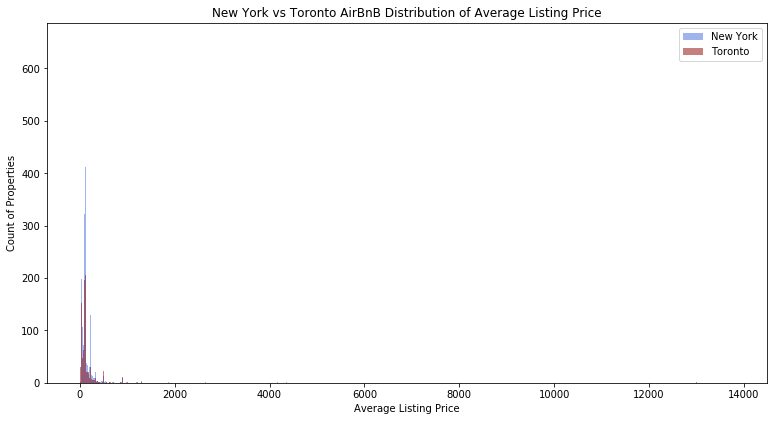

In [29]:
# plotting distribution of listing prices
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
bin_edges = np.arange(0, available_listings_ny['price'].max()+1, 1)
ax.hist(available_listings_ny.groupby('listing_id').
        mean()['price'],alpha=0.5, bins=bin_edges, label='New York', color='royalblue')
ax.hist(available_listings_to.
        groupby('listing_id').mean()['price'],alpha=0.5, bins=bin_edges, label='Toronto', color='darkred')
ax.legend()
ax.set_xlabel('Average Listing Price')
ax.set_ylabel('Count of Properties')
plt.title('New York vs Toronto AirBnB Distribution of Average Listing Price');

As a next step, I am plotting the same distribution, but limit the x-axis to listing prices between 0 and 300 USD. 

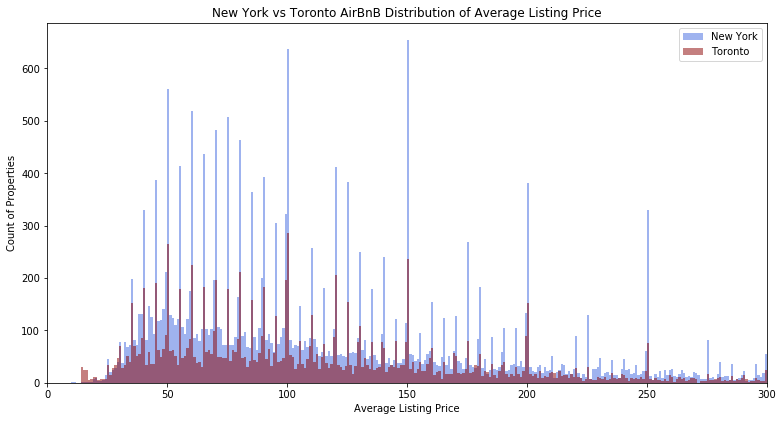

In [30]:
# plotting the same distribution including x-axis limits
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
bin_edges = np.arange(0, available_listings_ny['price'].max()+1, 1)
ax.hist(available_listings_ny.groupby('listing_id').
        mean()['price'],alpha=0.5, label='New York', bins=bin_edges, color='royalblue')
ax.hist(available_listings_to.
        groupby('listing_id').mean()['price'],alpha=0.5, label='Toronto', bins=bin_edges, color='darkred')
ax.legend()
ax.set_xlabel('Average Listing Price')
ax.set_ylabel('Count of Properties')
plt.title('New York vs Toronto AirBnB Distribution of Average Listing Price')
plt.xlim(0,300);

Good news for low budget travelers! Though the average prices for available listings is at 176 USD for New York and 155 USD for Toronto, the majority of the listing prices are under these values. There is even an substantial amount of listings with prices below 50 USD per night. In New York, the mode is at 150 USD, in Toronto at 100 USD. The majority of AirBnB hosts seem to set their prices in intervals of five and ten. 

So, what is the budget needed for a week's stay in New York or Toronto? Let's look at the median, minimum and maximum price per night. 

In [31]:
print('Out of the available listings, the median AirBnB price in New York is ${}.'.
      format(int(available_listings_ny['price'].median())),
      'Assuming the median price, a 6-night stay in a New York AirBnB costs ${}.'.
      format((int(available_listings_ny['price'].median())*6)), 
      'The cheapest AirBnB home in New York is listed at ${}.'.
      format((int(available_listings_ny['price'].min()))),
      'A 6-night stay would need a ${} budget.'.
      format((int(available_listings_ny['price'].min())*6)),
      'The most expensive AirBnB home in New York is listed at ${}.'.
      format((int(available_listings_ny['price'].max()))),
      'A 6-night stay would need a ${} budget.'.
      format((int(available_listings_ny['price'].max())*6)))

Out of the available listings, the median AirBnB price in New York is $112. Assuming the median price, a 6-night stay in a New York AirBnB costs $672. The cheapest AirBnB home in New York is listed at $10. A 6-night stay would need a $60 budget. The most expensive AirBnB home in New York is listed at $13798. A 6-night stay would need a $82788 budget.


In [32]:
print('Out of the available listings, the median AirBnB price in Toronto is ${}.'.
      format(int(available_listings_to['price'].median())),
      'Assuming the median price, a 6-night stay in a Toronto AirBnB costs ${}.'.
      format((int(available_listings_to['price'].median())*6)), 
      'The cheapest AirBnB home in Toronto is listed at ${}.'.
      format((int(available_listings_to['price'].min()))),
      'A 6-night stay would need a ${} budget.'.
      format((int(available_listings_to['price'].min())*6)),
      'The most expensive AirBnB home in Toronto is listed at ${}.'.
      format((int(available_listings_to['price'].max()))),
      'A 6-night stay would need a ${} budget.'.
      format((int(available_listings_to['price'].max())*6)))

Out of the available listings, the median AirBnB price in Toronto is $100. Assuming the median price, a 6-night stay in a Toronto AirBnB costs $600. The cheapest AirBnB home in Toronto is listed at $13. A 6-night stay would need a $78 budget. The most expensive AirBnB home in Toronto is listed at $13000. A 6-night stay would need a $78000 budget.


### <a id="where"/>  In which neighborhoods should I stay?

There are a number of characteristics one could use to determine which neighborhoods are most attractive for a stay. I decided to look into:
- Airbnb density (more Airbnbs = higher likelihood of finding a listing at my preferred travel dates): Which are the neighbourhoods with the highest density of Airbnb accommodations?
- Reviews: Which neighbourhoods have the best average reviews? Which neighborhoods have the best reviews for the AirBnB location? 
- Price: How do the neighborhoods compare in price? 
- Room type: How do the neighbourhoods compare in availability of certain room types?

#### AirBnB density by neighborhood group

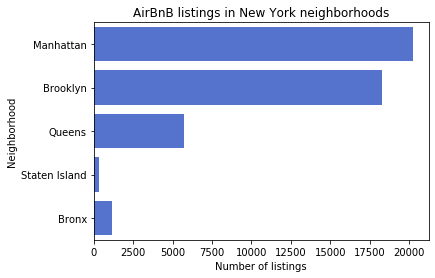

In [33]:
# plotting number of listings by neighborhood group
sns.countplot(data=listings_ny, y='neighbourhood_group_cleansed', color='royalblue')
plt.xlabel('Number of listings')
plt.ylabel('Neighborhood')
plt.title('AirBnB listings in New York neighborhoods');

In New York, the highest AirBnB density is in Manhattan, followed by Brooklyn. Staten Island has the least amount of Airbnbs. 

For Toronto, the above plot is not as easily reproducable, as the *neighbourhood_group_cleansed* column is empty. To achieve a similar visualization, I am deciding to plot the top 5 Toronto neighbourhoods for number of AirBnB listings instead. 

In [34]:
# identifying top 5 neighborhoods
# https://stackoverflow.com/questions/45615306/get-top-rows-from-column-value-count-with-pandas
top_5_toronto = listings_to['neighbourhood_cleansed'].value_counts()[:5].sort_values(ascending=False)
top_5_toronto = pd.DataFrame({'neighbourhood_cleansed':top_5_toronto.index}).merge(listings_to, how='left')

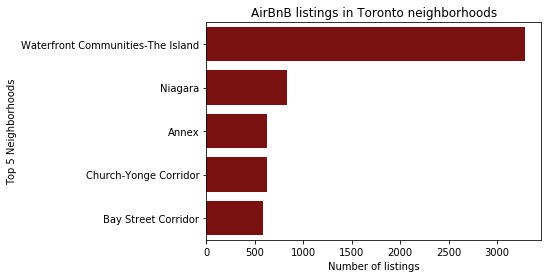

In [35]:
# plotting top 5 neighborhoods in Toronto with highest number of listings
sns.countplot(data=top_5_toronto, y='neighbourhood_cleansed', color='darkred')
plt.xlabel('Number of listings')
plt.ylabel('Top 5 Neighborhoods')
plt.title('AirBnB listings in Toronto neighborhoods');

In Toronto, "Waterfront Communities-The Island" is the neighborhood that has by far the highest number of Airbnb listings. 
On a map, the Airbnb density by neighbourhood group looks like this (including all 140 neighbourhoods for Toronto):

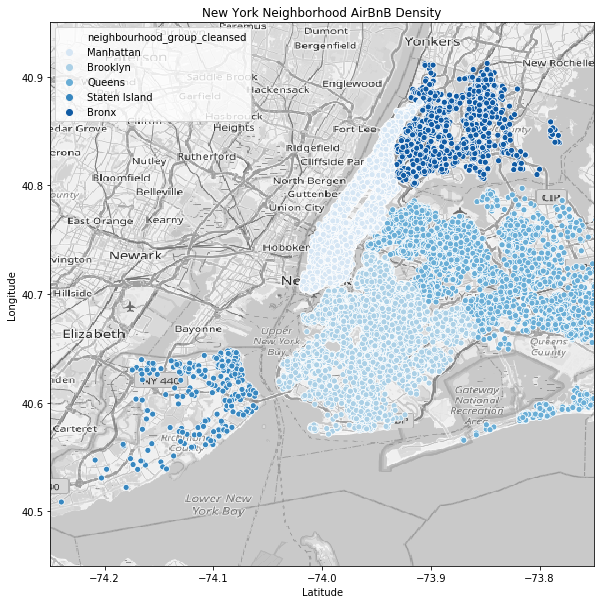

In [36]:
# https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db
# plotting AirBnB locations in New York by neighbourhood group
map_edges_ny = (-74.25,-73.75,40.45,40.95)
map_img_ny = plt.imread('newyork_data/map_ny.png')

fig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(listings_ny.longitude,listings_ny.latitude,hue=listings_ny.neighbourhood_group_cleansed, palette='Blues')
ax.set_xlim(map_edges_ny[0],map_edges_ny[1])
ax.set_ylim(map_edges_ny[2],map_edges_ny[3])
ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude')
ax.set_title('New York Neighborhood AirBnB Density')

ax.imshow(map_img_ny, zorder=0, extent = map_edges_ny, aspect= 'equal');

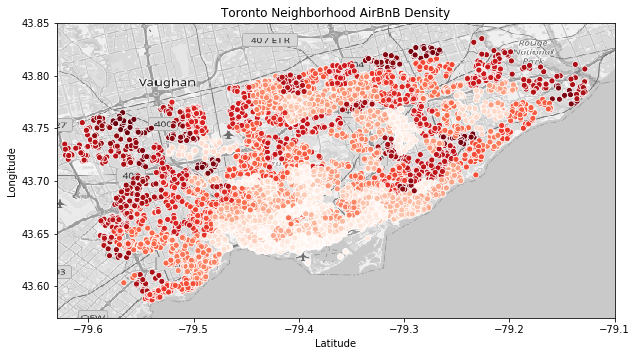

In [37]:
# plotting AirBnB locations in Toronto by neighbourhood group
fig, ax = plt.subplots(figsize = (10,10))
map_to = plt.imread('toronto_data/map_to.png')
sns.scatterplot(listings_to.longitude,listings_to.latitude,hue=listings_to.neighbourhood_cleansed, palette='Reds', legend=None)
ax.set_xlim(-79.63,-79.1)
ax.set_ylim(43.57,43.85)
ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude')
ax.set_title('Toronto Neighborhood AirBnB Density')
ax.imshow(map_to, extent=[-79.63,-79.1, 43.57,43.85], aspect='equal');

#### Neighborhoods with the best average review score

An important factor in choosing where to stay is how happy previous guests were with their stay. Therefore, I want to look into review scores next. First, I am looking at the review-related columns more closely, to determine which one I need for my analysis. 

In [38]:
#displaying first 5 rows of listings_ny to assess values in review related columns
listings_ny[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
             'review_scores_communication', 'review_scores_location','review_scores_value']].head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,94.0,9.0,9.0,10.0,10.0,10.0,9.0
1,89.0,8.0,9.0,9.0,9.0,9.0,9.0
2,90.0,8.0,8.0,10.0,10.0,9.0,9.0
3,97.0,10.0,10.0,10.0,10.0,8.0,10.0
4,84.0,9.0,7.0,9.0,9.0,10.0,9.0


In [39]:
# a closer look at review_scores_rating's summary statistics
listings_ny.review_scores_rating.describe()

count    34054.000000
mean        93.878693
std          9.323709
min         20.000000
25%         92.000000
50%         97.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

Judging from this, I am going to interpret "review_scores_rating" as an overall rating, with 100 as the highest score. As the summary statistics suggest, the reviews are overly positive, with a mean of 93.88 for all NYC listings.

In [40]:
# calculating average review score by neighborhood
top_reviews_ny = listings_ny.groupby('neighbourhood_group_cleansed').review_scores_rating.mean().sort_values(ascending=False)
top_reviews_to = top_5_toronto.groupby('neighbourhood_cleansed').review_scores_rating.mean().sort_values(ascending=False)

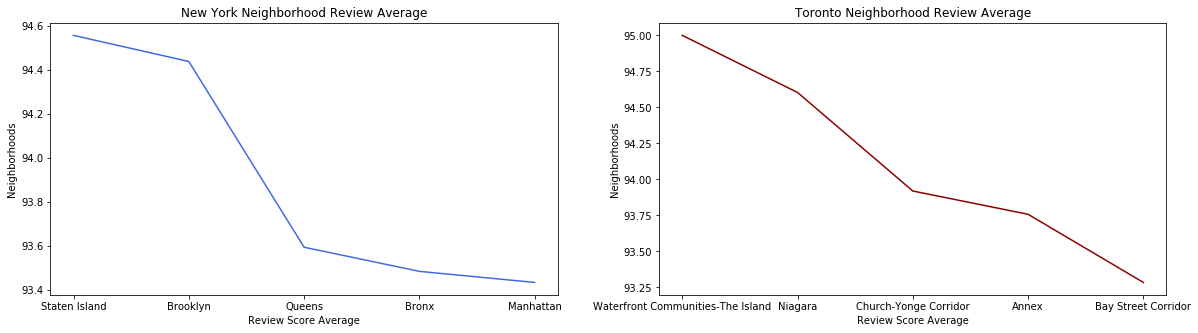

In [41]:
#plotting the scores by neighborhood
fig = plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.plot(top_reviews_ny, label='New York', color='royalblue')
plt.ylabel('Neighborhoods')
plt.xlabel('Review Score Average')
plt.title('New York Neighborhood Review Average')

plt.subplot(1, 2, 2)
plt.plot(top_reviews_to, label='Toronto', color='darkred')
plt.ylabel('Neighborhoods')
plt.xlabel('Review Score Average')
plt.title('Toronto Neighborhood Review Average');

Both Waterfront and Niagara have higher average review scores than the highest rated New York neighborhood groups (Staten Island and Brooklyn). In New York, Manhattan has the on average lowest rated listings. In Toronto, Bay Street Corridor has the on average lowest rated listings. 

As an example of the individual review components, I am having a look at average location scores for the neighbourhoods next: 

In [42]:
# calculating average review score by neighborhood
top_locations_ny = listings_ny.groupby('neighbourhood_group_cleansed').review_scores_location.mean().sort_values(ascending=False)
top_locations_to = top_5_toronto.groupby('neighbourhood_cleansed').review_scores_location.mean().sort_values(ascending=False)

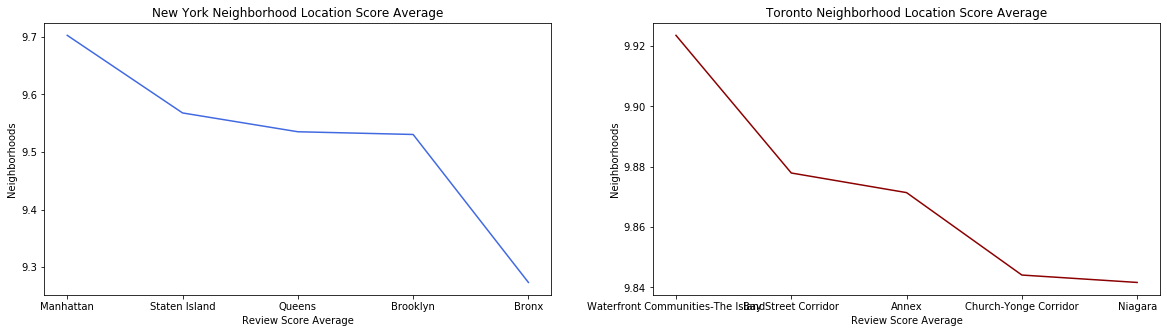

In [43]:
# plotting the scores by neighborhood
fig = plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.plot(top_locations_ny, label='New York', color='royalblue')
plt.ylabel('Neighborhoods')
plt.xlabel('Review Score Average')
plt.title('New York Neighborhood Location Score Average')

plt.subplot(1, 2, 2)
plt.plot(top_locations_to, label='Toronto', color='darkred')
plt.ylabel('Neighborhoods')
plt.xlabel('Review Score Average')
plt.title('Toronto Neighborhood Location Score Average');

Manhattan listings have the best average location score in New York, followed by Staten Island, Queens and Brooklyn. The Bronx listings have the lowest New York location score average. In Toronto, Waterfront Communities have the by far best average location score, followed by Bay Street Corridor and Annex. Church-Yonge Corridor and Niagara have the lowest averages - that are somehow still higher than the Manhattan location average.

#### Neighbourhoods compared by price

After determining in which neighbourhoods I have the most Airbnbs to choose from, and where the listings have the highest average rating, it is time to look at prices again. Again, I am using neighborhood groups for New York, and the  top 5 neighborhoods by AirBnB density for Toronto. 

In [44]:
# calculating the average price per listing by neighbourhood
top_prices_ny = listings_ny.groupby('neighbourhood_group_cleansed').price.mean().sort_values(ascending=False)
top_prices_to = top_5_toronto.groupby('neighbourhood_cleansed').price.mean().sort_values(ascending=False)

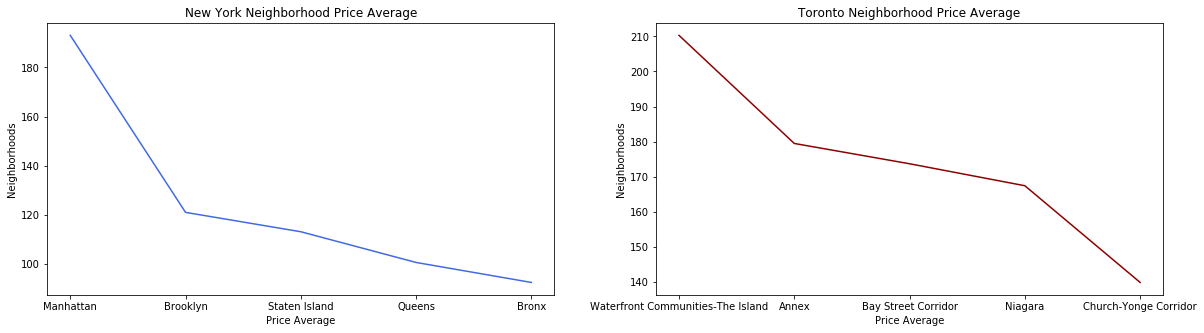

In [45]:
# plotting average price per listing by neighbourhood
fig = plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.plot(top_prices_ny, label='New York', color='royalblue')
plt.ylabel('Neighborhoods')
plt.xlabel('Price Average')
plt.title('New York Neighborhood Price Average')

plt.subplot(1, 2, 2)
plt.plot(top_prices_to, label='Toronto', color='darkred')
plt.ylabel('Neighborhoods')
plt.xlabel('Price Average')
plt.title('Toronto Neighborhood Price Average');

In New York, Manhattan is by far more expensive than the other neighbourhood groups. For Brooklyn, the average (ca. 120 USD) price is over 60 USD cheaper. The cheapest stay is possible in the Bronx, with on average under 100 USD per night. While the median Airbnb price in Toronto is lower than in New York, the top 5 neighbourhoods are on the more expensive side. Waterfront listings' average prices are at 210 USD per night, Annex still at Manhattan prices. All other "cheaper" neighbourhoods are still on average more expensive than Brooklyn.

Again, let's have a look at the average listing prices on a map. Due to the high amount of outliers, I am using a snapshot with listings up to 250 USD in price. For Toronto, I am again visualizing data from all neighbourhoods.

In [46]:
# filtering the listings for prices under 250 USD
ny_snapshot = listings_ny.query('price < 250')
to_snapshot = listings_to.query('price < 250')

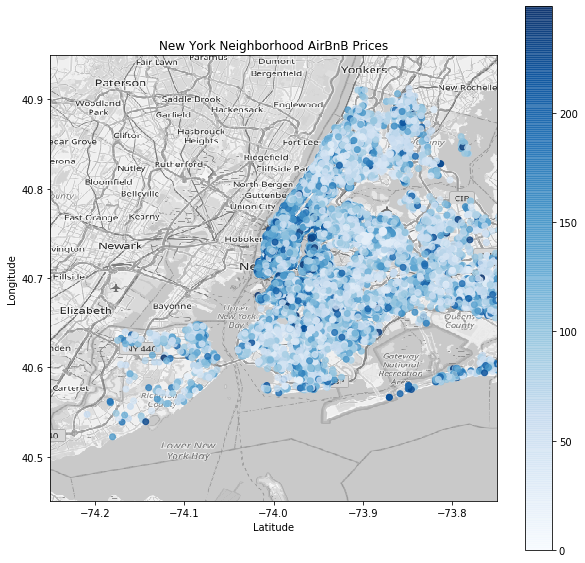

In [47]:
# plotting AirBnB locations in New York by average listing price
map_edges_ny = (-74.25,-73.75,40.45,40.95)
map_img_ny = plt.imread('newyork_data/map_ny.png')
cm = plt.cm.get_cmap('Blues')

fig, ax = plt.subplots(figsize = (10,10))
sc = ax.scatter(data=ny_snapshot, x='longitude', y='latitude', c='price', cmap=cm, alpha=0.8)
plt.colorbar(sc)
ax.set_xlim(map_edges_ny[0],map_edges_ny[1])
ax.set_ylim(map_edges_ny[2],map_edges_ny[3])
ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude')
ax.set_title('New York Neighborhood AirBnB Prices')

ax.imshow(map_img_ny, zorder=0, extent = map_edges_ny, aspect= 'equal');

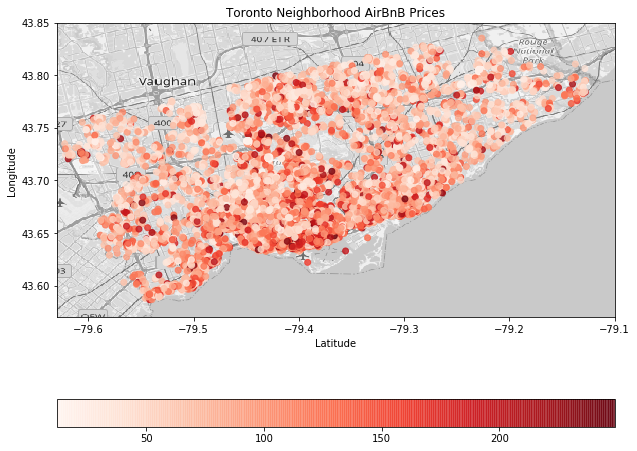

In [48]:
# plotting AirBnB locations in New York by average listing price
map_edges_to = (-79.63,-79.1,43.57,43.85)
map_img_to = plt.imread('toronto_data/map_to.png')
cm = plt.cm.get_cmap('Reds')

fig, ax = plt.subplots(figsize = (10,10))
sc = ax.scatter(data=to_snapshot, x='longitude', y='latitude', c='price', cmap=cm, alpha=0.8)
plt.colorbar(sc, orientation="horizontal")
ax.set_xlim(map_edges_to[0],map_edges_to[1])
ax.set_ylim(map_edges_to[2],map_edges_to[3])
ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude')
ax.set_title('Toronto Neighborhood AirBnB Prices')

ax.imshow(map_img_to, zorder=0, extent = map_edges_to, aspect= 'equal');

As expected, the occurence of dark blue spots is quite high in Manhattan. In Toronto, Airbnbs closer to the Waterfront seem to be more expensive. 

Finally, let's have a closer look at the distribution of prices by neighbourhood, by plotting violinplots of price by neighborhood. 

In [49]:
# filtering the listings for prices under 250 USD for the top 5 toronto neighbourhoods
top_5_toronto_snapshot = top_5_toronto.query('price < 250')

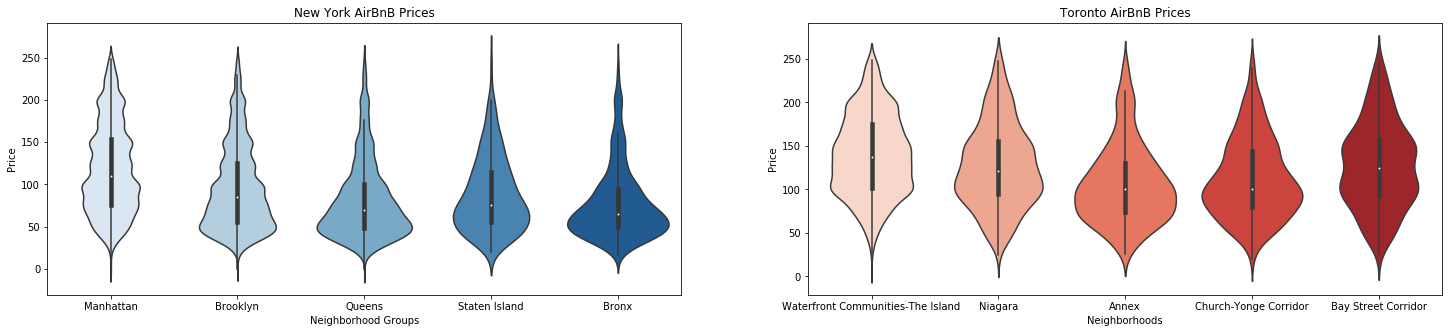

In [50]:
# plotting violin plots for price by neighbourhood
fig = plt.figure(figsize=(25,5))

plt.subplot(1, 2, 1)
sns.violinplot(data=ny_snapshot, x='neighbourhood_group_cleansed', y='price', palette='Blues')
plt.ylabel('Price')
plt.xlabel('Neighborhood Groups')
plt.title('New York AirBnB Prices')

plt.subplot(1, 2, 2)
sns.violinplot(data=top_5_toronto_snapshot, x='neighbourhood_cleansed', y='price', palette='Reds')
plt.ylabel('Price')
plt.xlabel('Neighborhoods')
plt.title('Toronto AirBnB Prices');

These graphs underline the previous observations on price by neighbourhood. The price distribution in Manhattan is flattest, though it seems harder to find listings below 50 USD per night than in the other New York neighbourhood group. On the other hand, there is a distinct concentration of low priced listings with only a minority of listings above 100 USD per stay in the Bronx. In Toronto, the 5 evaluated neighborhoods are on the more expensive side, especially in the Waterfront communities. Best chances for low budget travelers to find low-priced listings are in Annex and Church-Yonge Corridor. Niagara and Bay Street Corridor have the most balanced distribution of lower price and medium to high price listings.  

After evaluating neighborhood AirBnB density, price, location and reviews, I am having a quick look at room types. Typically, I prefer staying in private rooms or entire apartments when booking with AirBnB. Let's have a look if those room types are equally distributed in all neighbourhoods:

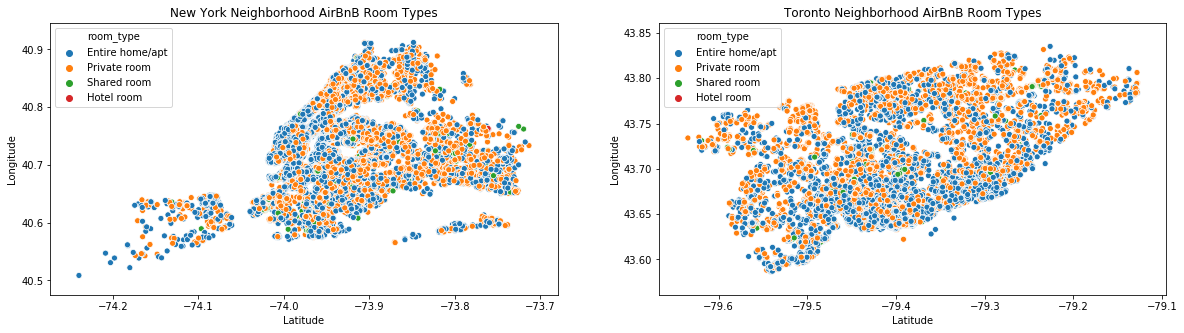

In [51]:
# plotting listings by room type 
fig = plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.scatterplot(listings_ny.longitude,listings_ny.latitude,hue=listings_ny.room_type)
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.title('New York Neighborhood AirBnB Room Types')

plt.subplot(1, 2, 2)
sns.scatterplot(listings_to.longitude,listings_to.latitude,hue=listings_to.room_type)
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.title('Toronto Neighborhood AirBnB Room Types');

Both room types seem to be widely available in different areas of both cities. How expensive is it to book a stay in different room types in the neighbourhoods? To exclude high-price outliers, I am again only visualizing listings below 250 USD per night.

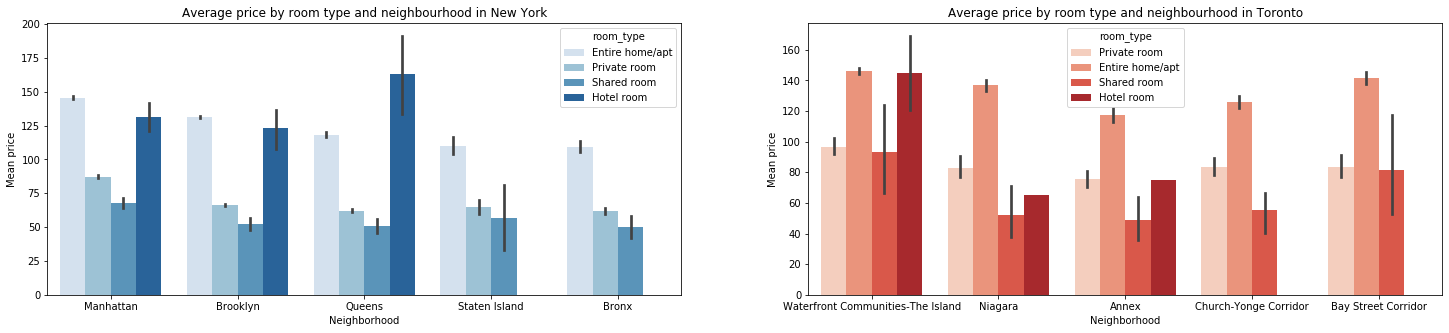

In [52]:
# plotting average price by neighbourhood and room type
plt.figure(figsize = [25, 5])
# New York
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# create the plot
sns.barplot(data = ny_snapshot, x = 'neighbourhood_group_cleansed', y = 'price', hue='room_type', palette='Blues')
plt.ylabel('Mean price')
plt.xlabel('Neighborhood')
plt.title('Average price by room type and neighbourhood in New York')

# Toronto
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# create the plot
sns.barplot(data = top_5_toronto_snapshot, x = 'neighbourhood_cleansed', y = 'price', hue='room_type', palette='Reds')
plt.ylabel('Mean price')
plt.xlabel('Neighborhood')
plt.title('Average price by room type and neighbourhood in Toronto');

As expected, shared room is the cheapest room type across all neighborhoods in both cities. On average most expensive is entire apartment, with the exception of Queens in New York, where hotel rooms rented out via AirBnB are most expensive. Staten Island, the Bronx, Church-Yonge Corridor and Bay Street Corridor don't seem to list hotel rooms on AirBnB. In Toronto, the cheapest neighbourhood to rent entire apartments on AirBnB is Annex, in New York it is the Bronx. 

Within this section, I evaluated all New York neighbourhood groups and the top 5 Toronto neighbourhoods with the highest AirBnB density. Manhattan and the Waterfront Communities have the highest AirBnB density. Staten Island and the Waterfront Communities have the best average listing review score rating, Manhattan and the Waterfront Communities lead the average listing location review score. At the same time, those neighbourhoods also have the by far highest average listing price (when averaging all listing prices up to 250 USD). Shared room is the cheapest room type across all neighborhoods in both cities. On average most expensive is entire apartment, with the exception of Queens in New York, where hotel rooms rented out via AirBnB are most expensive. Staten Island, the Bronx, Church-Yonge Corridor and Bay Street Corridor don't seem to list hotel rooms on AirBnB. In Toronto, the cheapest neighbourhood to rent entire apartments on AirBnB is Annex, in New York it is the Bronx. 

Which neighbourhood to choose then? 
In New York most AirBnBs are in Manhattan, which has the best average location reviews, but also highest average prices and worst overall reviews. Staten Island has the best average reviews, second best location and a good price level. Brooklyn has the second most listings, second best review score and reasonable pricing level. Looking at the combination of reviews, price, location, and availability of Airbnb and room type options, Brooklyn and Staten Island seem to be the most interesting to what I am looking for. 

In Toronto, Waterfront Communities has the best reviews but also the matching prices. Combining all reviewed features, Annex can convince with a (comparably) reasonable price level, good reviews and okay location score average, while offering a wide range of room types to choose from. 

To get a clearer picture of the neighbourhoods, I am adding text data to the analysis in my next question.

### <a id="vibe"/>  Do different neighbourhoods have a different vibe?

So far, my questions could largely be answered by using descriptive statistics and with only little data processing. As a next step, I want to use word analysis to see how listing names and reviews are described in different cities and neighbourhoods. What are the most common words used to describe a listing? How does this compare from New York to Toronto? Do different neighbourhoods have a different vibe? How does this compare to the buzzwords used in the reviews?

For this analysis, I am using a simple function to remove numbers and special characters from a string, a function that uses list comprehensions, nltk, itertools and matplotlib to process text from a column and return a plot of most used words and their word count for listing names, and a similar function doing the same for review texts. 

In [53]:
# downloading nltk libraries english language stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  

[nltk_data] Downloading package stopwords to C:\Users\Maren
[nltk_data]     Zoller\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
# defining a function to remove numbers and special characters from text
def only_alphabet(txt):
    """Replace numbers and special characters found in a text string with nothing.

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same text string with digits and special characters removed.
    """
    x = re.sub(r"[^a-zA-Z]+", ' ', txt)
    return x

In [55]:
# defining a function to determine top buzzwords used in listing names
# https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/
def top_buzzwords(listings_list, num, chart_color, list_title):
    """Taking in text from the name column in the listings dataframe, removing digits, special characters 
    and stopwords, create a list of words and word counts, and return a bar chart visualizing the most used 
    words in the column.
    
    Parameters
    ----------
    listings_list : series
        The dataframe column that is used as basis for the word count.
        
    num: int
        The number of words to be plotted, e.g. 5 for a top 5
        
    chart_color: string, rgb, ...
        The color used for the bars in the visualization
        
    list_title: string 
        The plot title

    Returns
    -------
    A bar chart visualizing word counts for the most used words in listing names.
    """
    # initializing empty list for storing listing names
    l_names = []

    # getting strings from the column and adding them to the list
    for name in listings_list.name:
        l_names.append(name)
        
    # removing digits and special characters
    words_clean = [only_alphabet(str(name)) for name in l_names]
        
    # removing capital letters, splitting l_names into individual words
    words_in_names = [name.lower().split() for name in words_clean]
    
    # removing stopwords
    names_nsw = [[word for word in name_words if not word in stop_words]
              for name_words in words_in_names]

    # List of all words across names
    all_words = list(itertools.chain(*names_nsw))
    
    # Create counter
    counts = collections.Counter(all_words)

    clean_words_nsw = pd.DataFrame(counts.most_common(num),
                             columns=['Buzzwords', 'Word Count'])
    
    # plot top 10 buzzwords
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot horizontal bar graph
    clean_words_nsw.sort_values(by='Word Count').plot.barh(x='Buzzwords',
                          y='Word Count',
                          ax=ax,
                          color=chart_color)

    ax.set_title("Common Words Found in {}".format(list_title))

    plt.show()

In [56]:
# adapting the top_buzzwords function to determine top buzzwords used in listing reviews
def top_review_buzzwords(reviews_list, num, chart_color, list_title):
    """Taking in text from the comment column in the reviews dataframe, removing digits, special characters 
    and stopwords, create a list of words and word counts, and return a bar chart visualizing the most used 
    words in the column.
    
    Parameters
    ----------
    reviews_list : series
        The dataframe column that is used as basis for the word count.
        
    num: int
        The number of words to be plotted, e.g. 5 for a top 5
        
    chart_color: string, rgb, ...
        The color used for the bars in the visualization
        
    list_title: string 
        The plot title

    Returns
    -------
    A bar chart visualizing word counts for the most used words in AirBnB reviews.
    """
    # initializing empty list for storing review comments
    l_comments = []

    # getting strings from the column and adding them to the list
    for comment in reviews_list.comments:
        l_comments.append(comment)
        
    # removing digits and special characters
    words_clean = [only_alphabet(str(comment)) for comment in l_comments]
        
    # removing capital letters, splitting l_comments into individual words
    words_in_comments = [comment.lower().split() for comment in words_clean]
    
    # removing stopwords
    comments_nsw = [[word for word in comment_words if not word in stop_words]
              for comment_words in words_in_comments]

    # List of all words across names
    all_words = list(itertools.chain(*comments_nsw))
    
    # Create counter
    counts = collections.Counter(all_words)

    clean_words_nsw = pd.DataFrame(counts.most_common(num),
                             columns=['Buzzwords', 'Word Count'])
    
    # plot top 10 buzzwords
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot horizontal bar graph
    clean_words_nsw.sort_values(by='Word Count').plot.barh(x='Buzzwords',
                          y='Word Count',
                          ax=ax,
                          color=chart_color)

    ax.set_title("Common Words Found in {}".format(list_title))

    plt.show()

Now, that the functions are defined, I can use them to plot the top words used to describe New York and AirBnB listings.

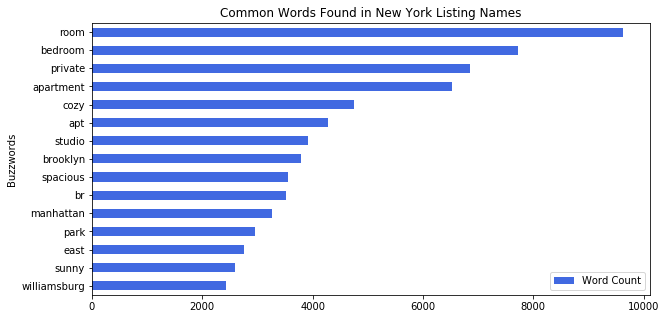

In [57]:
# plotting the top 15 words used to describe New York listings
top_buzzwords(listings_ny, 15, "royalblue", 'New York Listing Names')

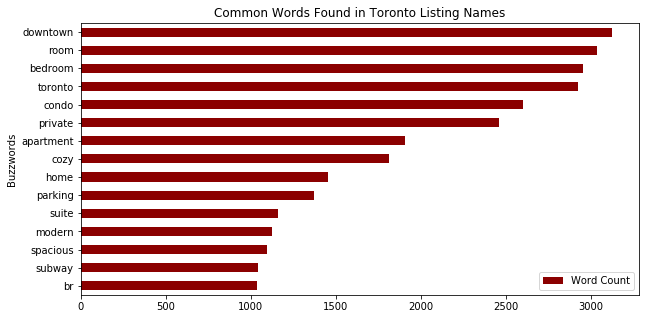

In [58]:
# plotting the top 15 words used to describe Toronto listings
top_buzzwords(listings_to, 15, 'darkred', 'Toronto Listing Names')

New York listing names use basic descriptions like "room", "bedroom", "apartment", "apt", "studio", and "br" (abbrev. for bedroom). The third most common word is "private", other adjectives are "cozy", "spacious", and "sunny". Locations are important as well, with "manhattan", "brooklyn", and "williamsburg" making the list. 

Toronto is more focused on location, with "downtown" being the most used word. Again, basic descriptions like "room", "bedroom", "apartment", "condo", "suite", and "br" are used. The 9th most used word is "home". Listings are again "private", "cozy", and "spacious", but also "modern". Transportation seems to be important as well, as both "parking" and "subway" make the list. 

Do Airbnb guests use similar words in their listing reviews? 

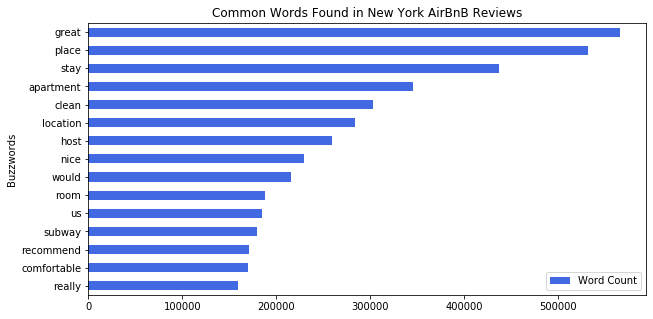

In [59]:
# plotting the top 15 words used in reviews of New York listings
top_review_buzzwords(reviews_ny, 15, "royalblue", 'New York AirBnB Reviews')

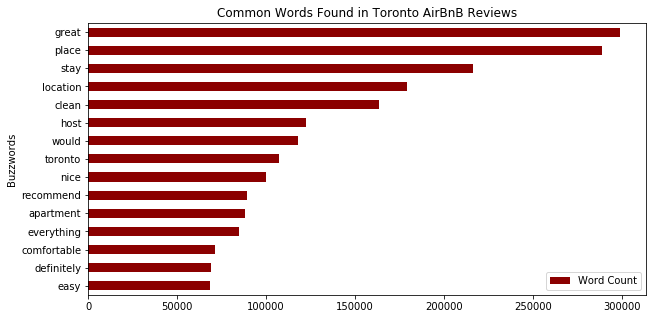

In [60]:
# plotting the top 15 words used in reviews of Toronto listings
top_review_buzzwords(reviews_to, 15, "darkred", 'Toronto AirBnB Reviews')

New York "apartment"s are "great" "place"s to "stay". Guests appreciate "clean" "room"s,"nice" "location"s and "host"s. They "would" "really" "recommend" the place, and also mention being "comfortable" and the "subway". 

Toronto "apartment"s are "great" "place"s to "stay", as well. Here, "location", "clean"liness and the "host" are mentioned in this sequence. Again, they would "recommend" the "nice" "apartment", were "everything" has been "comfortable", and "definitely" "easy".

Both cities sound like great places to stay at an AirBnB. Next, I am having a look at some individual neighbourhoods, to see if the words used in their listing names and review texts differ from each other. First, I need to map neighbourhood groups (respectively neighbourhoods in Toronto) to the review texts. 

In [61]:
# Merging reviews_ny and listings_ny
reviews_listings_ny = pd.merge(reviews_ny, listings_ny, how='inner', left_on=['listing_id'], right_on=['id'])

# creating a dataframe including reviews data and neighbourhood groups data
reviews_neighborhoods_ny = reviews_listings_ny[['listing_id', 'id_x', 'date', 'reviewer_id', 'reviewer_name', 'comments', 'neighbourhood_group_cleansed']]
reviews_neighborhoods_ny.head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,neighbourhood_group_cleansed
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r\nNous avons app...,Manhattan
1,2595,19176,2009-12-05,53267,Cate,Great experience.,Manhattan
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...,Manhattan
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en...",Manhattan
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...,Manhattan


In [62]:
# Merging reviews_to and listings_to
reviews_listings_to = pd.merge(reviews_to, listings_to, how='inner', left_on=['listing_id'], right_on=['id'])

# creating a dataframe including reviews data and neighbourhood data for Toronto
reviews_neighborhoods_to = reviews_listings_to[['listing_id', 'id_x', 'date', 'reviewer_id', 'reviewer_name', 'comments', 'neighbourhood_cleansed']]
reviews_neighborhoods_to.head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,neighbourhood_cleansed
0,1419,38924112,2015-07-19,11308465,Marcela,Having the opportunity of arriving to Alexandr...,Little Portugal
1,1419,44791978,2015-08-29,9580285,Marco,We have no enough words to describe how beauty...,Little Portugal
2,1419,45957133,2015-09-07,38394721,Andrea,The listing was exceptional and an even better...,Little Portugal
3,1419,67295154,2016-03-28,3515044,Shaun,Alexandra's home was amazing and in such a nea...,Little Portugal
4,1419,177702208,2017-08-03,13987100,Kate,Beautiful home. Very comfortable and clean. Pe...,Little Portugal


Now, I am ready to plot the top 15 words used in listing names and reviews for the neighbourhoods. I chose to look at Manhattan, Brooklyn, and Staten Island for New York; Waterfront Communities, Annex, and Niagara for Toronto. 

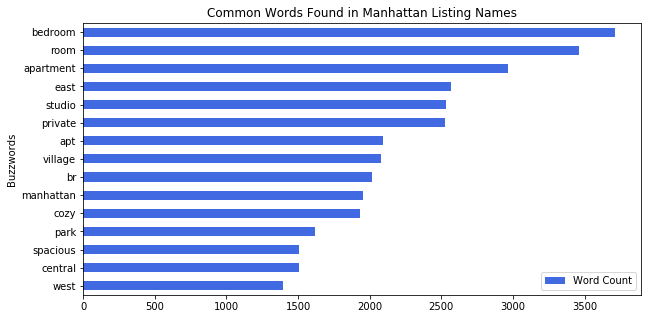

In [63]:
# plotting the top 15 words used to describe Manhattan listings
listings_manhattan = listings_ny.query('neighbourhood_group_cleansed == "Manhattan"')
top_buzzwords(listings_manhattan, 15, 'royalblue', 'Manhattan Listing Names')

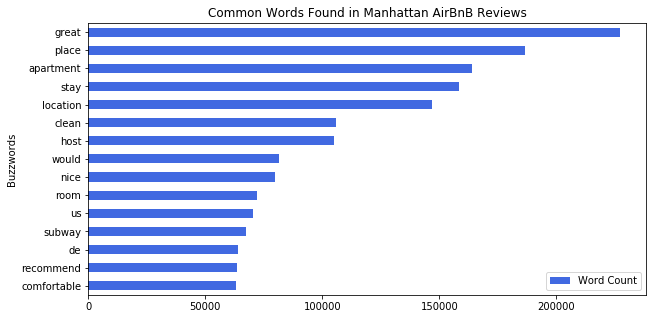

In [64]:
# plotting the top 15 words used in Manhattan reviews
reviews_manhattan = reviews_neighborhoods_ny.query('neighbourhood_group_cleansed == "Manhattan"')
top_review_buzzwords(reviews_manhattan, 15, 'royalblue', 'Manhattan AirBnB Reviews')

Manhattan listings are described as private, cozy and spacious, listing names focus on locations ("east", "west", "central" "park", "manhattan", "village") and basic descriptions such as "room", "bedroom", "studio", and "apartment". 
Reviews are similar to overall reviews of New York, with "apartment" and "location" ranking higher in the list. Next, I am looking at Brooklyn.

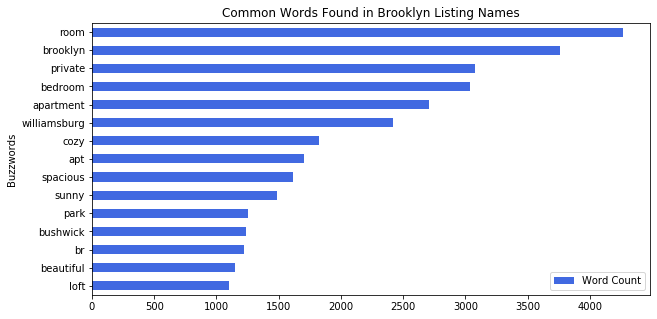

In [65]:
# plotting the top 15 words used to describe Brooklyn listings
listings_brooklyn = listings_ny.query('neighbourhood_group_cleansed == "Brooklyn"')
top_buzzwords(listings_brooklyn, 15, 'royalblue', 'Brooklyn Listing Names')

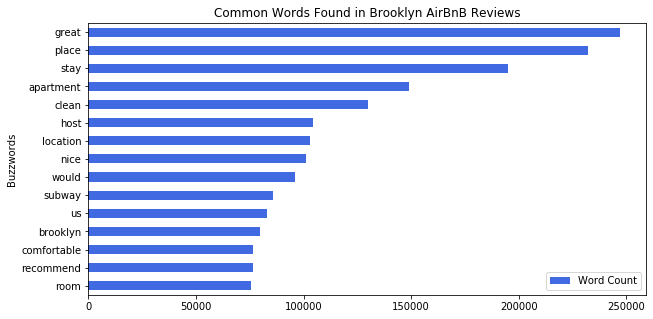

In [66]:
# plotting the top 15 words used in Brooklyn reviews
reviews_brooklyn = reviews_neighborhoods_ny.query('neighbourhood_group_cleansed == "Brooklyn"')
top_review_buzzwords(reviews_brooklyn, 15, 'royalblue', 'Brooklyn AirBnB Reviews')

Brooklyn listings are described as "private", "cozy", "spacious", "sunny", and "beautiful". They are mentioning Brooklyn, Williamsburg or Bushwick. Their descriptions speak of "room"s, "bedroom"s, "apartment"s and "loft"s.
"Clean"liness is mentioned before "location" in reviews, "comfortable" climbs up one spot in comparison to Manhattan. Reviewers mention "brooklyn" in their reviews. Next, I am looking at Staten Island: 

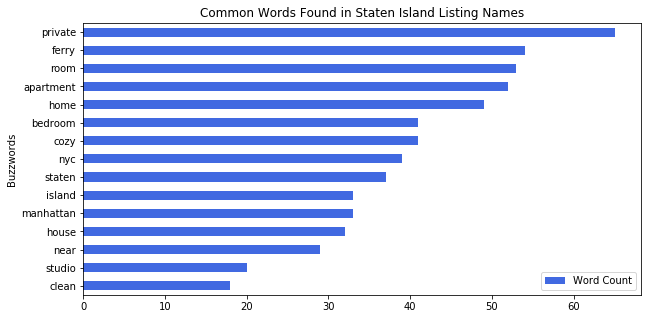

In [67]:
# plotting the top 15 words used to describe Staten Island listings
listings_staten = listings_ny.query('neighbourhood_group_cleansed == "Staten Island"')
top_buzzwords(listings_staten, 15, 'royalblue', 'Staten Island Listing Names')

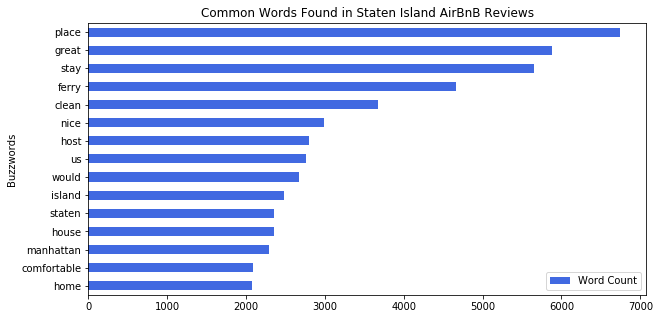

In [68]:
# plotting the top 15 words used in Staten Island reviews
reviews_staten = reviews_neighborhoods_ny.query('neighbourhood_group_cleansed == "Staten Island"')
top_review_buzzwords(reviews_staten, 15, 'royalblue', 'Staten Island AirBnB Reviews')

Staten Island listing names seem to focus on the vicinity to the "staten" "island" "ferry" and "manhattan". "Private" is the most used word. "Room"s, "apartment"s, "bedroom"s and "studio"s are "cozy" and "clean". Reviews again mention the "staten" "island" "ferry" and "manhattan". They describe the "place"s as "great", "clean", "nice" and comfortable.

Next, I am looking at the Toronto neighborhoods, starting with Waterfront Communities. 

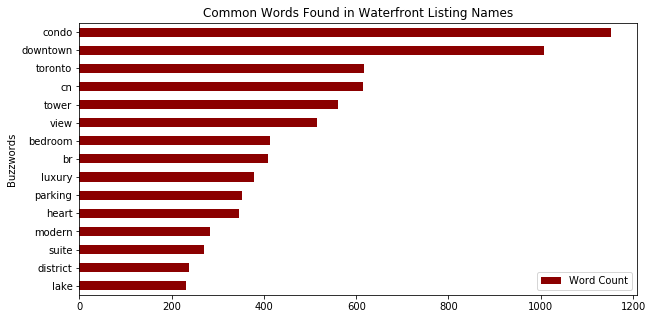

In [69]:
# plotting the top 15 words used to describe Waterfront Communities listings
listings_waterfront = listings_to.query('neighbourhood_cleansed == "Waterfront Communities-The Island"')
top_buzzwords(listings_waterfront, 15, 'darkred', 'Waterfront Listing Names')

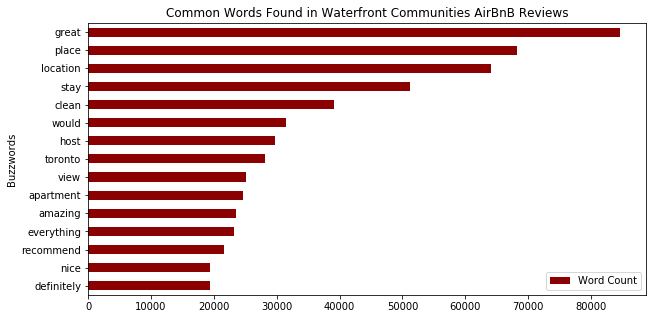

In [70]:
# plotting the top 15 words used in describe Waterfront reviews
reviews_waterfront = reviews_neighborhoods_to.query('neighbourhood_cleansed == "Waterfront Communities-The Island"')
top_review_buzzwords(reviews_waterfront, 15, 'darkred', 'Waterfront Communities AirBnB Reviews')

The majority of listings in Waterfront seem to be "condo"s "downtown". Listing names mention the "cn" "tower", the "view", the "lake", "parking", "luxury" and are "modern". Reviewers appreciate the "great" "place", "location", and "view". Again, "clean"liness is mentioned, the listings are "amazing" and guests "would" "recommend" them.

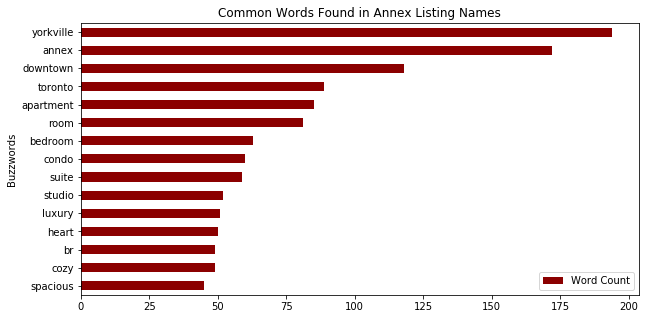

In [71]:
# plotting the top 15 words used to describe Annex listings
listings_niagara = listings_to.query('neighbourhood_cleansed == "Annex"')
top_buzzwords(listings_niagara, 15, 'darkred', 'Annex Listing Names')

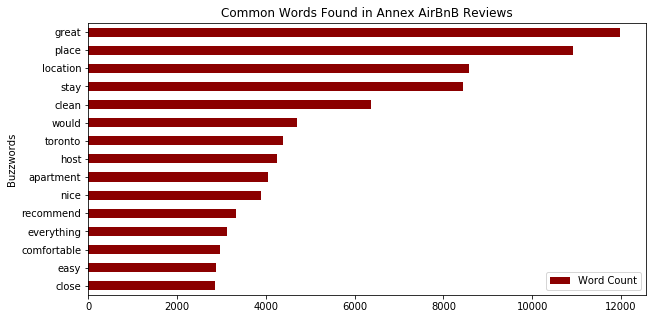

In [72]:
# plotting the top 15 words used in describe Annex reviews
reviews_annex = reviews_neighborhoods_to.query('neighbourhood_cleansed == "Annex"')
top_review_buzzwords(reviews_annex, 15, 'darkred', 'Annex AirBnB Reviews')

"Luxury" seems to be a common theme in Toronto, it is also mentioned in Annex listing names. The most common words describe locations, such as Yorkville, Annex and Toronto. The review texts are similar to those of Waterfront and the New York neighbourhoods. Instead of stressing the "view", the adjectives "comfortable", "easy" and "close" are mentioned. Lastly, I am looking at Niagara listing names and reviews.

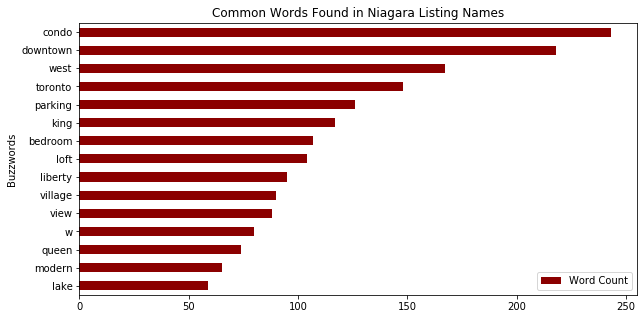

In [73]:
# plotting the top 15 words used to describe Niagara listings
listings_niagara = listings_to.query('neighbourhood_cleansed == "Niagara"')
top_buzzwords(listings_niagara, 15, 'darkred', 'Niagara Listing Names')

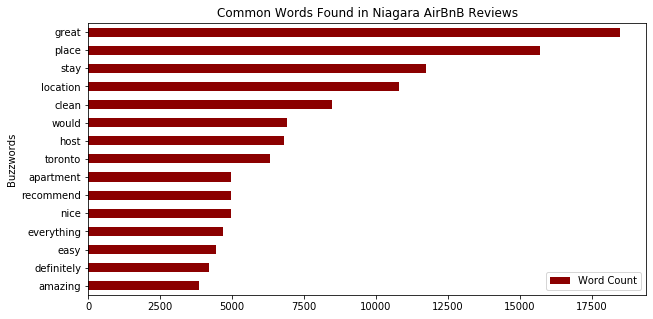

In [74]:
# plotting the top 15 words used in describe Niagara reviews
reviews_niagara = reviews_neighborhoods_to.query('neighbourhood_cleansed == "Niagara"')
top_review_buzzwords(reviews_niagara, 15, 'darkred', 'Niagara AirBnB Reviews')

Niagara listings mention "downtown", "parking", the "view", and the "lake". Interestingly, they also mention "king" and "queen", potentially describing king and queen beds? The reviews use similar words to the ones for Annex, but now "amazing" is in the list, while "comfortable" and "close" aren't. 

It appears that some words in both reviews (e.g. "great" "place" "stay") and listing names (e.g. "room", "bedroom") are universal. Listing names focus on location, room types and seem to be "cozy" and "spacious" in both cities and across neighbourhoods. 

## <a id="conclusion"/> Conclusion

**When is the best time to visit New York and Toronto?** 

By popularity (proportion of booked listings and average listing price), Christmas time and the summer months are the best time to visit both cities. If one wants to optimize for lower prices and higher proportion of AirBnBs to choose from, autumn and winter (except December), are the best time to visit the two cities. 

**What budget do I need to plan for accommodation in both cities?**

AirBnB listings in both cities cover a wide range of listing prices, including many high-priced outliers. My evaluation only featured available listings, and I evaluated median instead of mean listing prices. A night in a New York AirBnb has a 10 USD minimum, 112 USD median, and 13,798 USD maximum price. Therefore, the budget needed for a week (6 nights) is 60 USD minimum, 672 USD when assuming the median price, and maximum 82,788 USD. A night in a Toronto AirBnb has a 13 USD minimum, 100 USD median, and 13,00 USD maximum price. Therefore, the budget needed for a week (6 nights) is 78 USD minimum, 600 USD when assuming the median price, and maximum 78,000 USD.

**In which neighborhoods should I stay?**

Here, I reviewed all New York neighbourhood groups and the top 5 Toronto neighbourhoods with the highest AirBnB density. In New York most AirBnBs are in Manhattan, which has the best average location reviews, but also highest average prices and worst overall reviews. Staten Island has the best average reviews, second best location and a good price level. Brooklyn has the second most listings, second best review score and reasonable pricing level. Looking at the combination of reviews, price, location, and availability of Airbnb and room type options, Brooklyn and Staten Island seem to be the most interesting to what I am looking for. In Toronto, Waterfront Communities has the best reviews but also the matching prices. Combining all reviewed features, Annex can convince with a (comparably) reasonable price level, good reviews and okay location score average, while offering a wide range of room types to choose from.

**Do different neighbourhoods have a different vibe?**

In both cities, and across all evaluated neigbourhoods (Manhattan, Brooklyn, Staten Island, Waterfront Communities, Annex, and Niagara), basic description of room and apartment features dominate the listing names, e.g. "room", "bedroom", "apartment", "apt", "studio", "condo", or "suite". Adjectives that are used most common are "private", "cozy", and "spacious". New York listing names mention neighborhood names and listings being "sunny", Toronto listing names mention location ("downtown"), and transportation options ("parking", "subway"), and the attribute "home". 

Manhattan listing names are focused on locations ("east", "west", "central" "park", "manhattan", "village"), Brooklyn listing names focus on being "sunny" and "beautiful", and mentions "loft" as another listing descriptor. Staten Island listings mention the "ferry", "private" is the most common listing descriptor. Waterfront listings mention "condo"s "downtown", the "cn" "tower", the "view", the "lake", "parking", "luxury" and are "modern". Annex listings are also mentioning "luxury", the "heart" of "Toronto" and locations like "yorkville". Niagara listings mention "parking", the "view", and the "lake" - and also "king" and "queen" (beds?). 

Across both cities and neighbourhoods, reviewers praise "great", "place"s to "stay". Brooklyn and Manhattan review texts have similar most used words, with Brooklyn reviews using "clean" and "comfortable" more often. Again, Staten Island's unique selling point seems to be the "ferry". Waterfront listing reviews are "amazing" and have a "view". Annex review texts focus more on everything being "comfortable", "easy" and "close". Niagara reviews mention "amazing" and "easy", but not "comfortable" or a "view". 